In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set as sset; sset()

In [2]:
# constants ---------------------------------

class Constants:
    def __init__(self, taw: float, l: float):
        # taw is how long each time step lasts
        self.taw = taw
        
        # l is length of each walk step
        self.l = l
        
        # lattice will be from 0 to lattice_size
        self.lattice_size = 20
        
constants = Constants(taw=1, l=1)

In [3]:
# simulator function ------------------------

def random_walk(starting_place: float, p: float , number_of_tests: int) -> np.ndarray:
    '''
        Explanation:
            find lifetime that after that time walker goes out of the boundary
        
        Return:
            a float number of mean of the lifetimes
    '''
    
    lifetimes = np.zeros(number_of_tests)
    
    for n in range(number_of_tests):
        x = starting_place
        
        while True:
            # went right
            if np.random.binomial(1, p):
                x += constants.l
                
            # went left
            else:
                x -= constants.l

            lifetimes[n] += constants.taw
            
            if x < 0 or x > constants.lattice_size:
                break
            
            
    return lifetimes.mean()

In [4]:
# helper function -----------------------------------

def get_the_inputs():
    '''get from input and return p, number_of_tests, starting_places'''
    
    message = "please enter p: "
    p = float(input(message))
    
    message = "please enter number of tests: "
    number_of_tests = int(input(message))
    
    message = f"please enter an array of starting places: \n(note that the lattice is from 0 to {constants.lattice_size})\n\n"    
    # eval function evaluates input value as a python expression
    starting_places = eval(input(message))
    
    return p, number_of_tests, starting_places

In [5]:
# starting the main program -------------------------

def start():
    p, number_of_tests, starting_places = get_the_inputs()
    
    lifetimes = [random_walk(starting_place, p, number_of_tests) for starting_place in starting_places]
    
    plt.title(f"lattice is from 0 to {constants.lattice_size}")
    plt.xlabel("starting place")
    plt.ylabel("lifetime")

    plt.plot(starting_places, lifetimes)
    
    return [starting_places, lifetimes]

please enter p:  0.5
please enter number of tests:  10000
please enter an array of starting places: 
(note that the lattice is from 0 to 20)

 np.linspace(0, 20, 21)


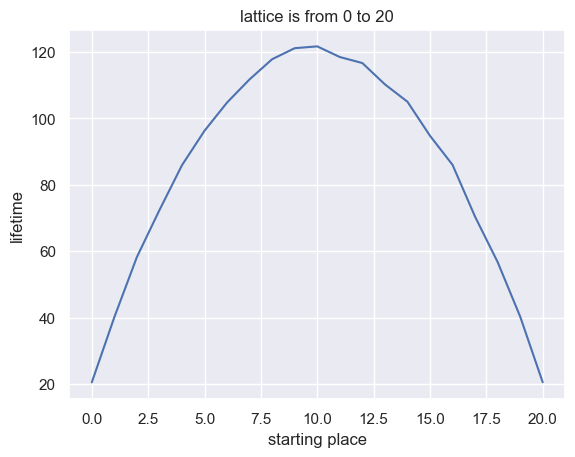

In [6]:
starting_places, lifetimes = start()

In [13]:
# saving data to use in the next problem ------------

np.savetxt('simulated_starting_places.csv', starting_places, delimiter=',')
np.savetxt('simulated_lifetimes.csv', lifetimes, delimiter=',')